In [1]:
import sympy as sym
from IPython.display import display
sym.init_printing()
print sym.__version__

1.1.1


## Marchenko-Pastur

In [2]:
x, f = sym.symbols('x f', positive=True)  # f is our fraction, p / n in the genetic case

In [3]:
f1 = (1 - sym.sqrt(f))**2
f2 = (1 + sym.sqrt(f))**2

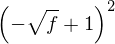

In [4]:
f1

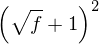

In [5]:
f2

In [6]:
mp = sym.Piecewise(
    (0, x < f1),
    (0, x > f2),
    (sym.sqrt((f2-x)*(x-f1))/(f*x*2*sym.pi), True)
)

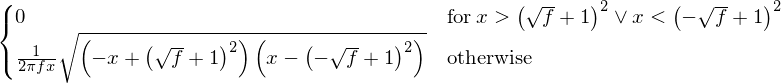

In [7]:
mp

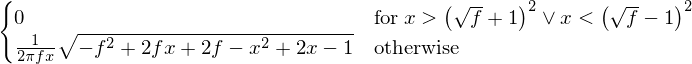

In [8]:
sym.simplify(mp)

In [9]:
# sym.integrate(mp, (x, f1, f2))  # had to abort

### Using results from Wolfram Alpha

In [10]:
def mproot(x):
    return sym.sqrt(-f**2+2*f*(x+1)-(x-1)**2)

def integral1(x):
    thing1 = sym.I*(f-1)*sym.log(2*(-(f-1)*mproot(x) - sym.I*(-f**2+f*(x+2)+x+1))/x/(f-1)**3)
    thing2 = -(f+1)*sym.atan((f-x+1)/mproot(x))
    return (mproot(x) + thing1 + thing2) / (2*sym.pi*f)

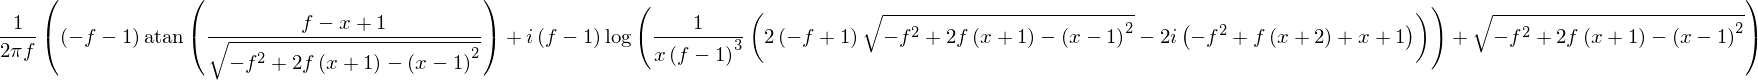

In [11]:
integral1(x)

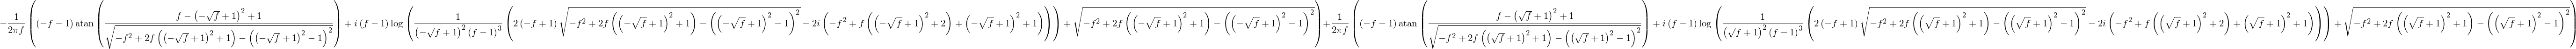

In [12]:
integral1(f2) - integral1(f1)

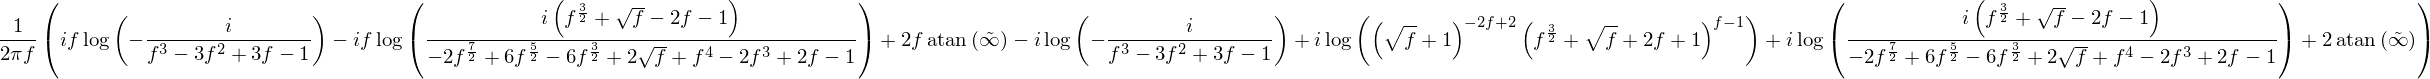

In [13]:
sym.simplify(integral1(f2) - integral1(f1))

In [14]:
a, b = sym.symbols('a, b', positive=True)

In [15]:
def integral2(x):
    return sym.sqrt((x-a)*(b-x)) + (a+b)/2*sym.asin((2*x-a-b)/(b-a)) - sym.sqrt(a*b)*sym.asin(((a+b)*x-2*a*b)/(x*(b-a)))

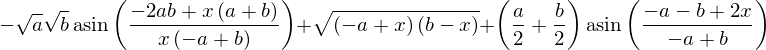

In [16]:
integral2(x)

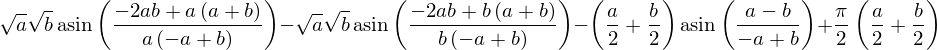

In [17]:
integral2(b) - integral2(a)

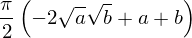

In [18]:
sym.simplify(integral2(b) - integral2(a))

In [19]:
good_result = sym.simplify(integral2(b) - integral2(a))

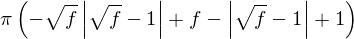

In [20]:
sym.simplify(good_result.subs(b, f2).subs(a, f1))

In [21]:
sym.simplify(f1*f2)

In [22]:
sym.simplify(f1+f2)

In [23]:
sym.simplify(sym.pi/2*(f1+f2-2*sym.Abs(f-1)))

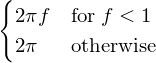

In [24]:
sym.simplify(sym.pi/2*(f1+f2-2*sym.Piecewise((1-f, f<1), (f-1, True))))

#### Good, math works!

#### Next: with a different factor?

In [25]:
l = sym.symbols('l', positive=True)

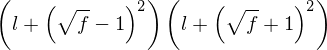

In [26]:
sym.simplify((f1+l)*(f2+l))

In [27]:
sym.simplify(sym.expand((f1+l)*(f2+l)))

In [28]:
good_result_2 = sym.simplify(
    sym.pi/2*((f1+l)+(f2+l)-2*sym.sqrt(sym.simplify(
        sym.expand((f1+l)*(f2+l))
    ))) / (2*sym.pi*f)
)

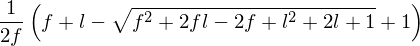

In [29]:
good_result_2

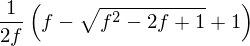

In [30]:
good_result_2.subs(l, 0)

#### Mean of the distribution?

In [ ]:
# sym.integrate(sym.sqrt((x-a)*(b-x)), x)